In [221]:
import anndata as ad
import matplotlib.pyplot as plt
import muon as mu
import pandas as pd
import scanpy as sc
import scirpy as ir
import numpy as np
import os

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [79]:
from matplotlib.ticker import FuncFormatter, PercentFormatter
ir.__version__
figPath = "figure-3.26"

In [224]:
BCMprefix = "/data/BCM/BCM_VDJ/"
BCMFiles = os.listdir(BCMprefix)
suffix = "/outs/all_contig_annotations.json"
bcm_ir = ir.io.read_10x_vdj(f"{BCMprefix}{BCMFiles[0]}{suffix}", filtered=True)
bcm_ir.obs_names

Index(['AAACCTGAGAAGCCCA-1', 'AAACCTGAGAGTGACC-1', 'AAACCTGAGCGACGTA-1',
       'AAACCTGTCCAAACTG-1', 'AAACCTGTCGGACAAG-1', 'AAACGGGTCTGCCAGG-1',
       'AAAGATGCAGTAAGAT-1', 'AAAGATGGTACTCAAC-1', 'AAAGCAAAGATTACCC-1',
       'AAAGCAACACTCGACG-1',
       ...
       'TTTGCGCGTCGGCTCA-1', 'TTTGCGCGTGGCCCTA-1', 'TTTGCGCTCCAAGTAC-1',
       'TTTGGTTAGATGCCTT-1', 'TTTGGTTCAAGTTAAG-1', 'TTTGTCACATCCGTGG-1',
       'TTTGTCACATCTGGTA-1', 'TTTGTCAGTCGGGTCT-1', 'TTTGTCATCCACTCCA-1',
       'TTTGTCATCGATCCCT-1'],
      dtype='object', name='cell_id', length=1661)

In [225]:
BCMFiles

['BCM_LABC9_TCR_HRR204719',
 'BCM_LABC8_TCR_HRR204704',
 'BCM_HER2BC10_TCR_HRR204721',
 'BCM_LABC9_TCR_HRR204715',
 'BCM_TNBC4_BCR_HRR204763',
 'BCM_LABC8_BCR_HRR204773',
 'BCM_HER2BC10_TCR_HRR204723',
 'BCM_TNBC2_TCR_HRR204695',
 'BCM_LABC9_BCR_HRR204778',
 'BCM_HER2BC10_TCR_HRR204726',
 'BCM_LABC9_BCR_HRR204785',
 'BCM_LABC8_TCR_HRR204705',
 'BCM_LABC8_TCR_HRR204711',
 'BCM_LABC9_TCR_HRR204717',
 'BCM_LABC7_TCR_HRR204700',
 'BCM_TNBC5_TCR_HRR204698',
 'BCM_LABC9_BCR_HRR204783',
 'BCM_HER2BC10_BCR_HRR204788',
 'BCM_LABC8_BCR_HRR204772',
 'BCM_LABC8_BCR_HRR204770',
 'BCM_TNBC4_TCR_HRR204697',
 'BCM_LABC8_TCR_HRR204706',
 'BCM_LABC9_TCR_HRR204712',
 'BCM_LABC8_BCR_HRR204774',
 'BCM_LABC9_TCR_HRR204716',
 'BCM_LABC7_BCR_HRR204767',
 'BCM_TNBC3_BCR_HRR204762',
 'BCM_LABC7_BCR_HRR204768',
 'BCM_LABC7_TCR_HRR204702',
 'BCM_TNBC6_BCR_HRR204765',
 'BCM_LABC8_BCR_HRR204775',
 'BCM_LABC7_TCR_HRR204703',
 'BCM_TNBC5_BCR_HRR204764',
 'BCM_HER2BC10_TCR_HRR204724',
 'BCM_LABC9_BCR_HRR204780',
 'BCM

In [226]:
# load BCY TBCR+count
BCMprefix = "/data/BCM/BCM_VDJ/"
BCMFiles = os.listdir(BCMprefix)
suffix = "/outs/all_contig_annotations.json"
bcm_ir = ir.io.read_10x_vdj(f"{BCMprefix}{BCMFiles[0]}{suffix}", filtered=True)
bcm_ir.obs_names = [f"{s}-{BCMFiles[0].split('_')[1]}-{BCMFiles[0].split('_')[3]}" for s in bcm_ir.obs_names]
bcm_ir.obs['sample'] = f"{BCMFiles[0].split('_')[1]}"
bcm_ir.obs['ir-type'] = f"{BCMFiles[0].split('_')[2]}"
bcm_ir.obs['run'] = f"{BCMFiles[0].split('_')[3]}"
for i in range(1, len(BCMFiles)):
    meta = BCMFiles[i].split('_')
    bcm_tcr = ir.io.read_10x_vdj(f"{BCMprefix}{BCMFiles[i]}{suffix}")
    bcm_tcr.obs_names = [f"{s}-{meta[1]}-{meta[3]}" for s in bcm_tcr.obs_names]
    bcm_ir.obs['sample'] = f"{meta[1]}"
    bcm_ir.obs['ir-type'] = f"{meta[2]}"
    bcm_ir.obs['run'] = f"{meta[3]}"
    bcm_ir = ir.pp.merge_airr(bcm_ir, bcm_tcr)
bcm_ir.obs_names

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Index(['AAACCTGAGAAGCCCA-1-LABC9-HRR204719',
       'AAACCTGAGAGTGACC-1-LABC9-HRR204719',
       'AAACCTGAGCGACGTA-1-LABC9-HRR204719',
       'AAACCTGTCCAAACTG-1-LABC9-HRR204719',
       'AAACCTGTCGGACAAG-1-LABC9-HRR204719',
       'AAACGGGTCTGCCAGG-1-LABC9-HRR204719',
       'AAAGATGCAGTAAGAT-1-LABC9-HRR204719',
       'AAAGATGGTACTCAAC-1-LABC9-HRR204719',
       'AAAGCAAAGATTACCC-1-LABC9-HRR204719',
       'AAAGCAACACTCGACG-1-LABC9-HRR204719',
       ...
       'TTTCCTCAGAGTAATC-1-LABC9-HRR204782',
       'TTTCCTCAGCAGCGTA-1-LABC9-HRR204782',
       'TTTCCTCCAAACTGCT-1-LABC9-HRR204782',
       'TTTGCGCAGGCGATAC-1-LABC9-HRR204782',
       'TTTGCGCGTGAGCGAT-1-LABC9-HRR204782',
       'TTTGGTTGTCTGCCAG-1-LABC9-HRR204782',
       'TTTGTCAGTCTCGTTC-1-LABC9-HRR204782',
       'TTTGTCATCACGAAGG-1-LABC9-HRR204782',
       'TTTGTCATCGCTGATA-1-LABC9-HRR204782',
       'TTTGTCATCTATCCCG-1-LABC9-HRR204782'],
      dtype='object', name='cell_id', length=95226)

In [ ]:
# load BCY TBCR+count
prefix = "/data/BCY/BCY-vdj/"
vdjFiles = os.listdir(prefix)
vdjFiles.sort()
vdjFiles = [ '5T','6N',
           '6T','8T','9T','10N','10T','12N','15T','16N',
           '17T','20T','21T','22T']
suffix_t = "/vdj_t/filtered_contig_annotations.csv"
suffix_b = "/vdj_b/filtered_contig_annotations.csv"

adata_tcr = ir.io.read_10x_vdj(f"{prefix}LC-5N{suffix_t}")
adata_tcr.obs_names = [f"{s}-5N" for s in adata_tcr.obs_names]
adata_bcr = ir.io.read_10x_vdj(f"{prefix}LC-5N{suffix_b}")
adata_bcr.obs_names = [f"{s}-5N" for s in adata_bcr.obs_names]
adata_ir = ir.pp.merge_airr(adata_tcr, adata_bcr)
for i in range(len(vdjFiles)):
    adata_tcr = ir.io.read_10x_vdj(f"{prefix}LC-{vdjFiles[i]}{suffix_t}")
    adata_tcr.obs_names = [f"{s}-{vdjFiles[i]}" for s in adata_tcr.obs_names]
    adata_bcr = ir.io.read_10x_vdj(f"{prefix}LC-{vdjFiles[i]}{suffix_b}")
    adata_bcr.obs_names = [f"{s}-{vdjFiles[i]}" for s in adata_bcr.obs_names]
    adata_ir = ir.pp.merge_airr(adata_ir, adata_tcr)
    adata_ir = ir.pp.merge_airr(adata_ir, adata_bcr)
adata_ir.obs_names

In [5]:
bcm_ir.write_h5ad("bcm-ir.h5ad")

In [6]:
bcm_preF = sc.read_h5ad("BCM-major.h5ad")

/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [60]:
bcm_preF

AnnData object with n_obs × n_vars = 218207 × 28474
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-major', 'major-type', 'sample', 'molecular_type'
    var: 'ID', 'name', 'type', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_leiden-major', 'hvg', 'leiden', 'leiden-major_colors', 'log1p', 'major-type_colors', 'neighbors', 'pca', 'rank_genes_groups', 'scrublet', 'umap', 'airr:receptor_type_colors', 'airr:receptor_subtype_colors', 'airr:chain_pairing_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [12]:
# BCM TCR+count
bcm_preF.obs_names = [f"{s.split('-')[0]}-1-{s.split('_')[1]}" for s in bcm_preF.obs_names]
bcm_ir.obs_names_make_unique()
bcm_preF.obs_names_make_unique()
bcm_ir.var_names_make_unique()
bcm_preF.var_names_make_unique()
bcm_preF.obs['sample'] = [f"{s.split('-')[2]}" for s in bcm_preF.obs_names]
bcm_preF.obs['molecular_type'] = ["HER2BC" if f"{s.split('-')[2]}".find("HER2BC") == 0 else f"{s.split('-')[2]}"[0:4] for s in bcm_preF.obs_names]
bcmdata = mu.MuData({'gex': bcm_preF, "airr":bcm_ir})
bcmdata

Filtering chains...
Indexing VJ chains...
Indexing VDJ chains...
build result array
Stored result in `mdata.obs["airr:receptor_type"]`.
Stored result in `mdata.obs["airr:receptor_subtype"]`.
Stored result in `mdata.obs["airr:chain_pairing"]`.


/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


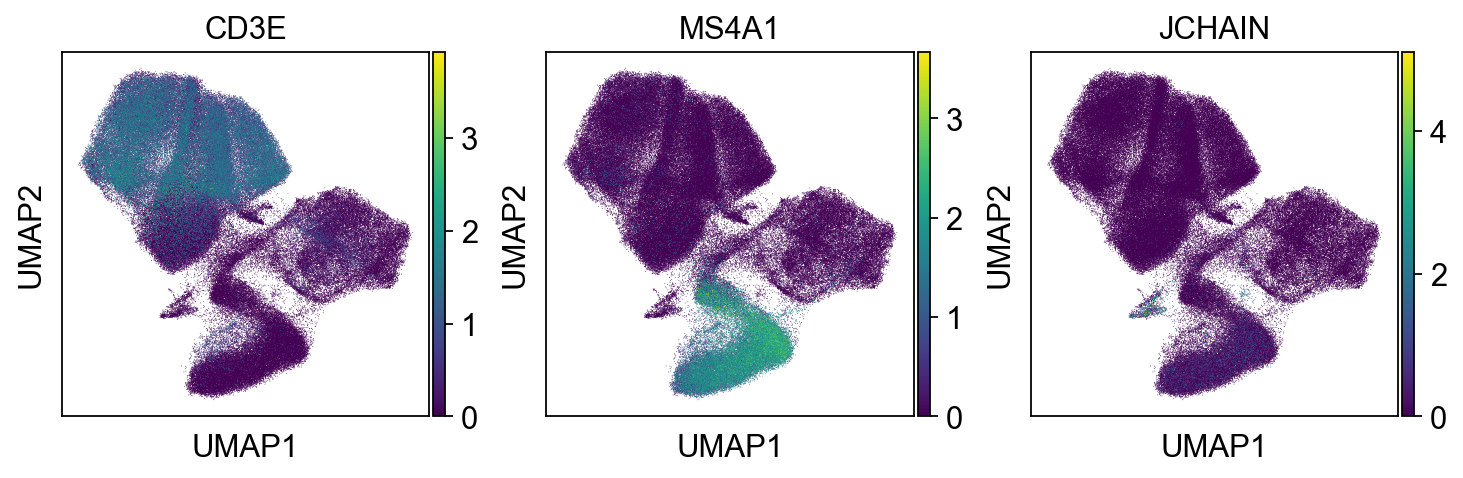

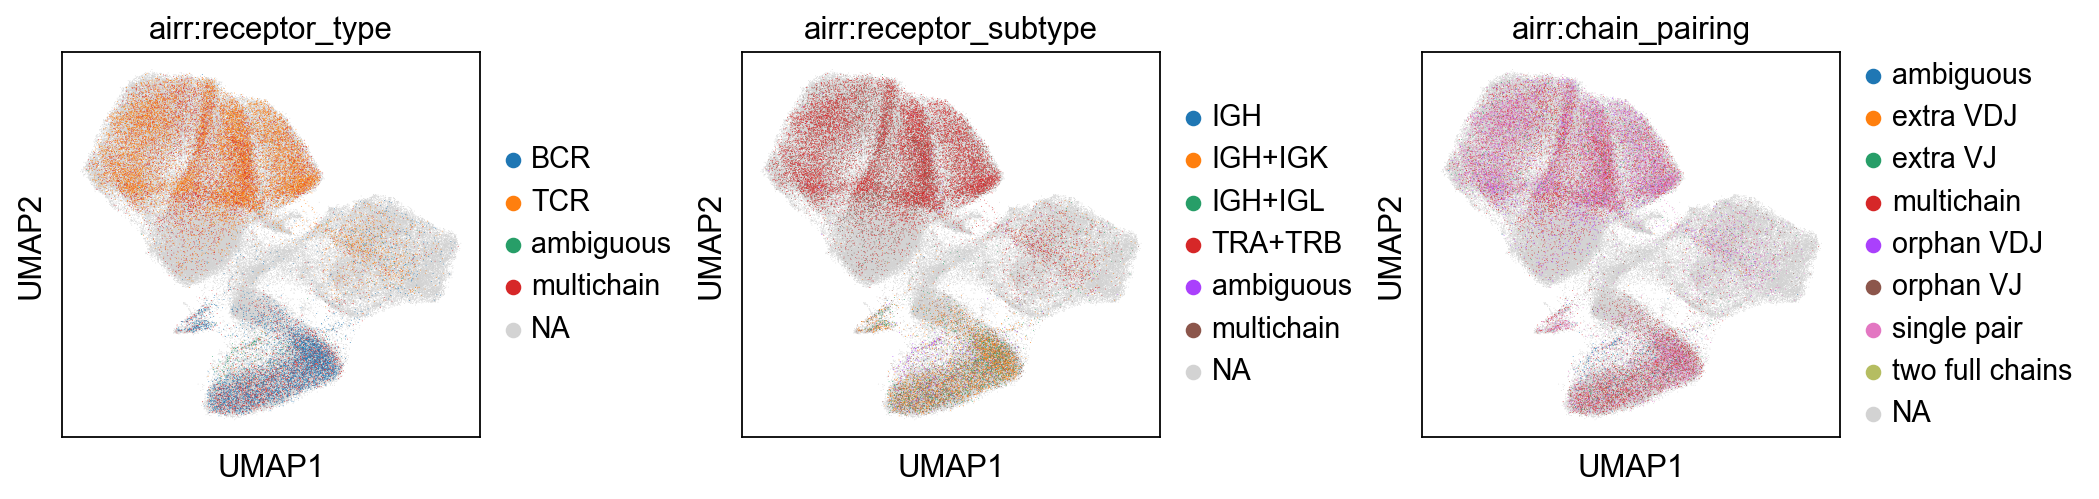

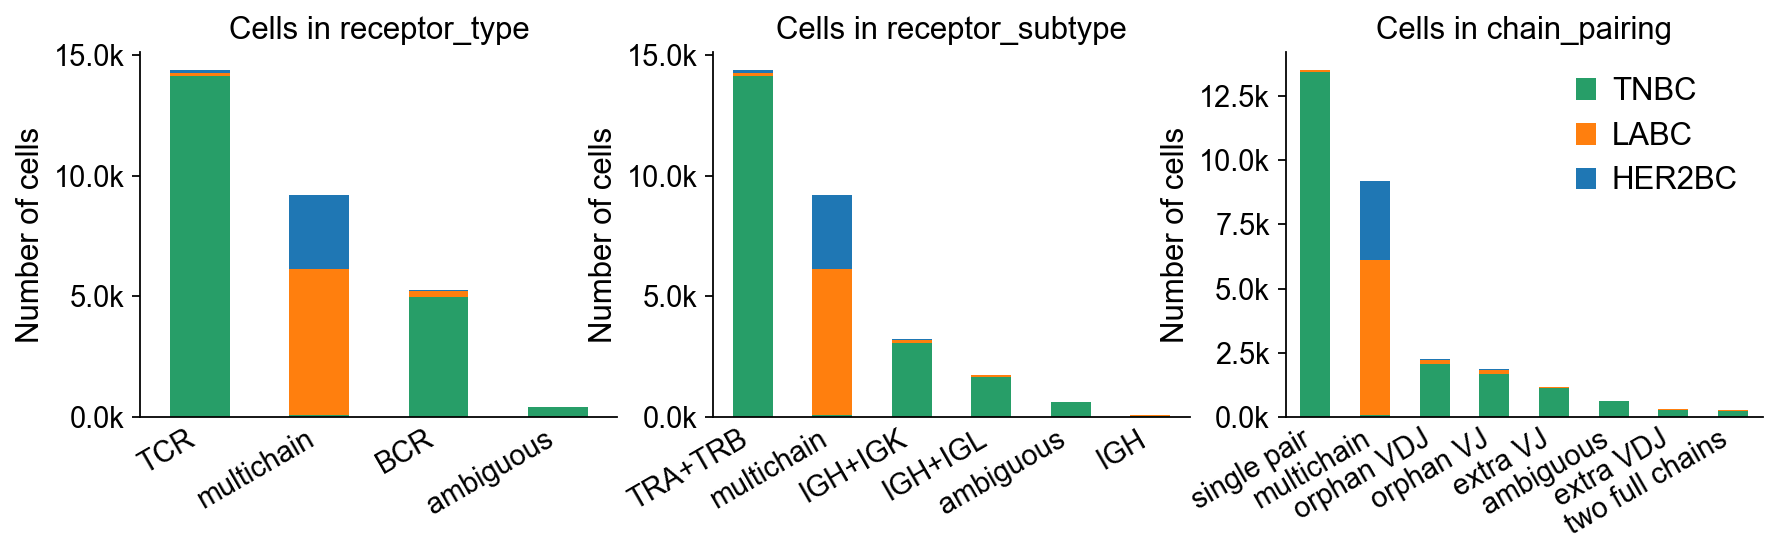

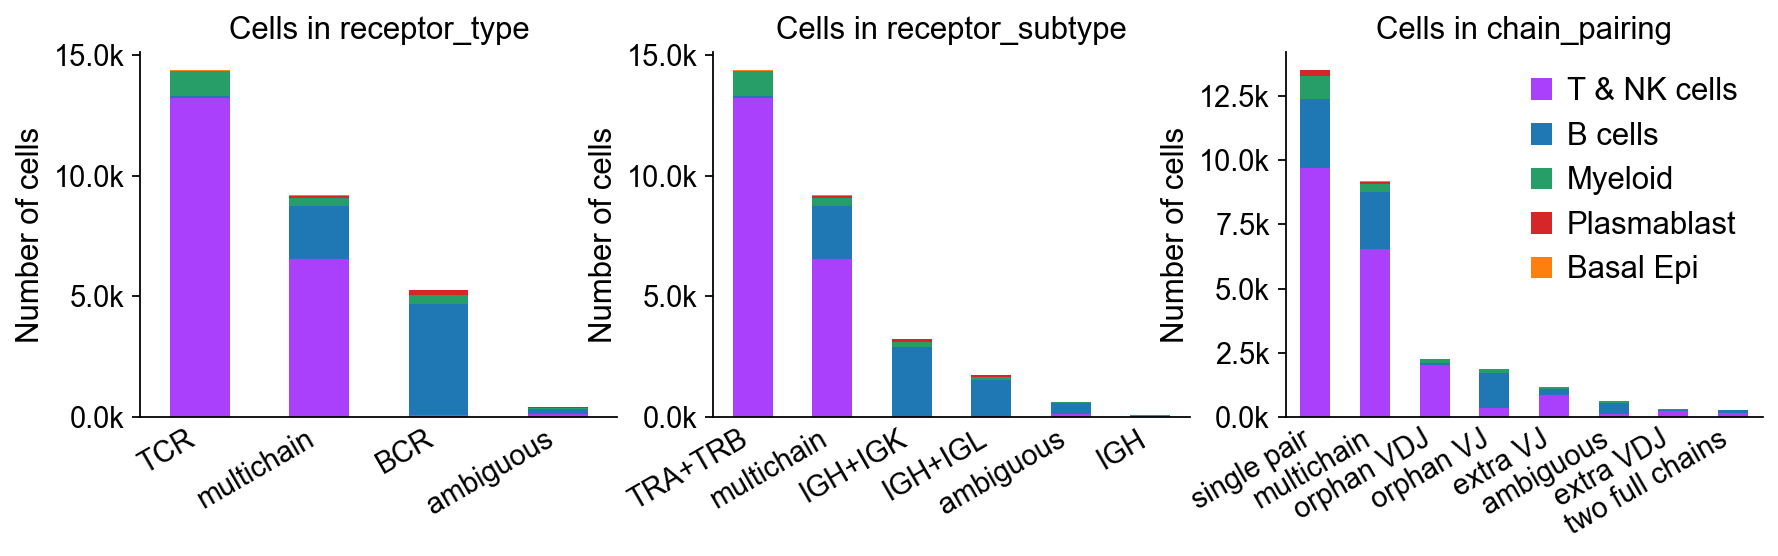

In [93]:
ir.pp.index_chains(bcmdata)
ir.tl.chain_qc(bcmdata)
figsize=(11,3)

# GENE EXPRESSION OF T,B cells
fig, ax = plt.subplots(1, 3,figsize=figsize)
for i,g in enumerate(["CD3E", 'MS4A1', 'JCHAIN']):
  mu.pl.embedding(bcmdata, basis="gex:umap", color=g, ax=ax[i], show=False)
  ax[i].set_xlabel("UMAP1")
  ax[i].set_ylabel("UMAP2")
fig.savefig(f"{figPath}/bcm-umap-expr.png", dpi=300, bbox_inches='tight')

# umap of TCR,BCR 
fig, ax = plt.subplots(1, 3,figsize=(13,3), constrained_layout=True)
for i,g in enumerate(["airr:receptor_type", "airr:receptor_subtype", 'airr:chain_pairing']):
  mu.pl.embedding(bcmdata, basis="gex:umap", color=g, ax=ax[i], show=False)
  ax[i].set_xlabel("UMAP1")
  ax[i].set_ylabel("UMAP2")
fig.savefig(f"{figPath}/bcm-umap-tbcr.png", dpi=300, bbox_inches='tight')

# abundance of TCR,BCR targeting molecular_type
def ks(x, pos):
    return '%1.1fk' % (x*1e-3)
fig, ax = plt.subplots(1, 3,figsize=(13,3))
for i,g in enumerate(["airr:receptor_type", "airr:receptor_subtype", 'airr:chain_pairing']):
  ir.pl.group_abundance(bcmdata, groupby=g, 
                        target_col="gex:molecular_type", 
                        ax=ax[i], 
                        style_kws={"title": "Cells in {}".format(g.split(":")[1]),
                                   "xlab": '',
                                   "title_fontsize":14, 
                                   "label_fontsize":14, 
                                   "tick_fontsize":13,
                                   "add_legend": True})
  ax[i].yaxis.set_major_formatter(FuncFormatter(ks))
ax[2].legend(fontsize=14,
      frameon=False, handletextpad=0.5, loc="best",
              borderpad=0.3,
              columnspacing=1.3,
              handlelength=0.65,)
fig.savefig(f"{figPath}/bcm-abundance-tbcr-molecular.png", dpi=300, bbox_inches='tight')

# abundance of TCR,BCR targeting major_type
fig, ax = plt.subplots(1, 3,figsize=(13,3))
for i,g in enumerate(["airr:receptor_type", "airr:receptor_subtype", 'airr:chain_pairing']):
  ir.pl.group_abundance(bcmdata, groupby=g, 
                        target_col="gex:major-type", 
                        ax=ax[i], 
                        style_kws={"title": "Cells in {}".format(g.split(":")[1]),
                                   "xlab": '',
                                   "title_fontsize":14, 
                                   "label_fontsize":14, 
                                   "tick_fontsize":13,
                                   "add_legend": True})
  ax[i].yaxis.set_major_formatter(FuncFormatter(ks))
ax[2].legend(fontsize=14,
      frameon=False, handletextpad=0.5, loc="best",
              borderpad=0.3,
              columnspacing=1.3,
              handlelength=0.65,)
fig.savefig(f"{figPath}/bcm-abundance-tbcr-major.png", dpi=300, bbox_inches='tight')

In [94]:
ir.pp.ir_dist(bcmdata, metric="identity", sequence="nt", key_added="ir_dist_nt_identity", n_jobs=16)
ir.tl.define_clonotypes(bcmdata, key_added="clone_id", same_v_gene=False, dual_ir='primary_only',receptor_arms="all" )

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.
Initializing lookup tables. 
Computing clonotype x clonotype distances.
NB: Computation happens in chunks. The progressbar only advances when a chunk has finished. 


  0%|          | 0/21475 [00:00<?, ?it/s]

Stored result in `mdata.obs["airr:clone_id"]`.
Stored result in `mdata.obs["airr:clone_id_size"]`.


<AxesSubplot: >

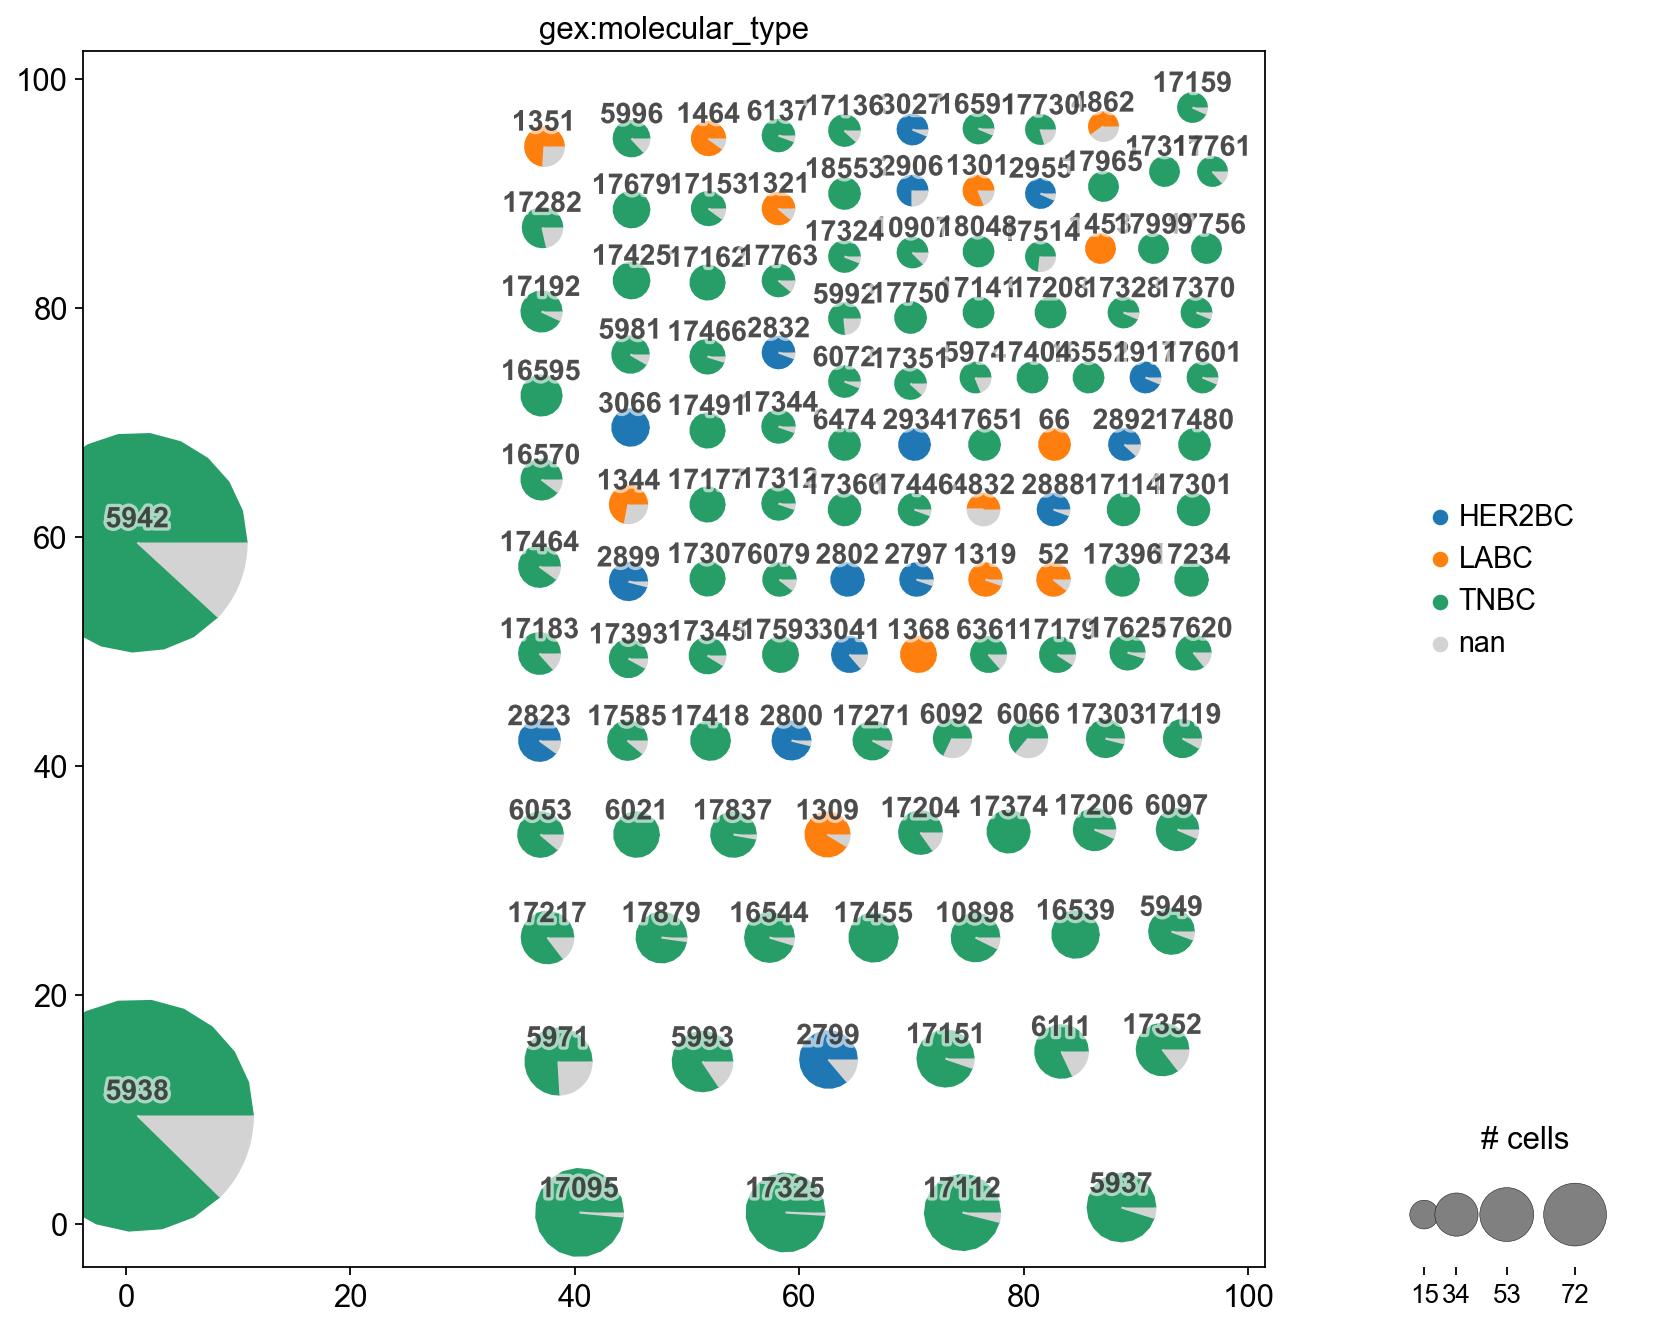

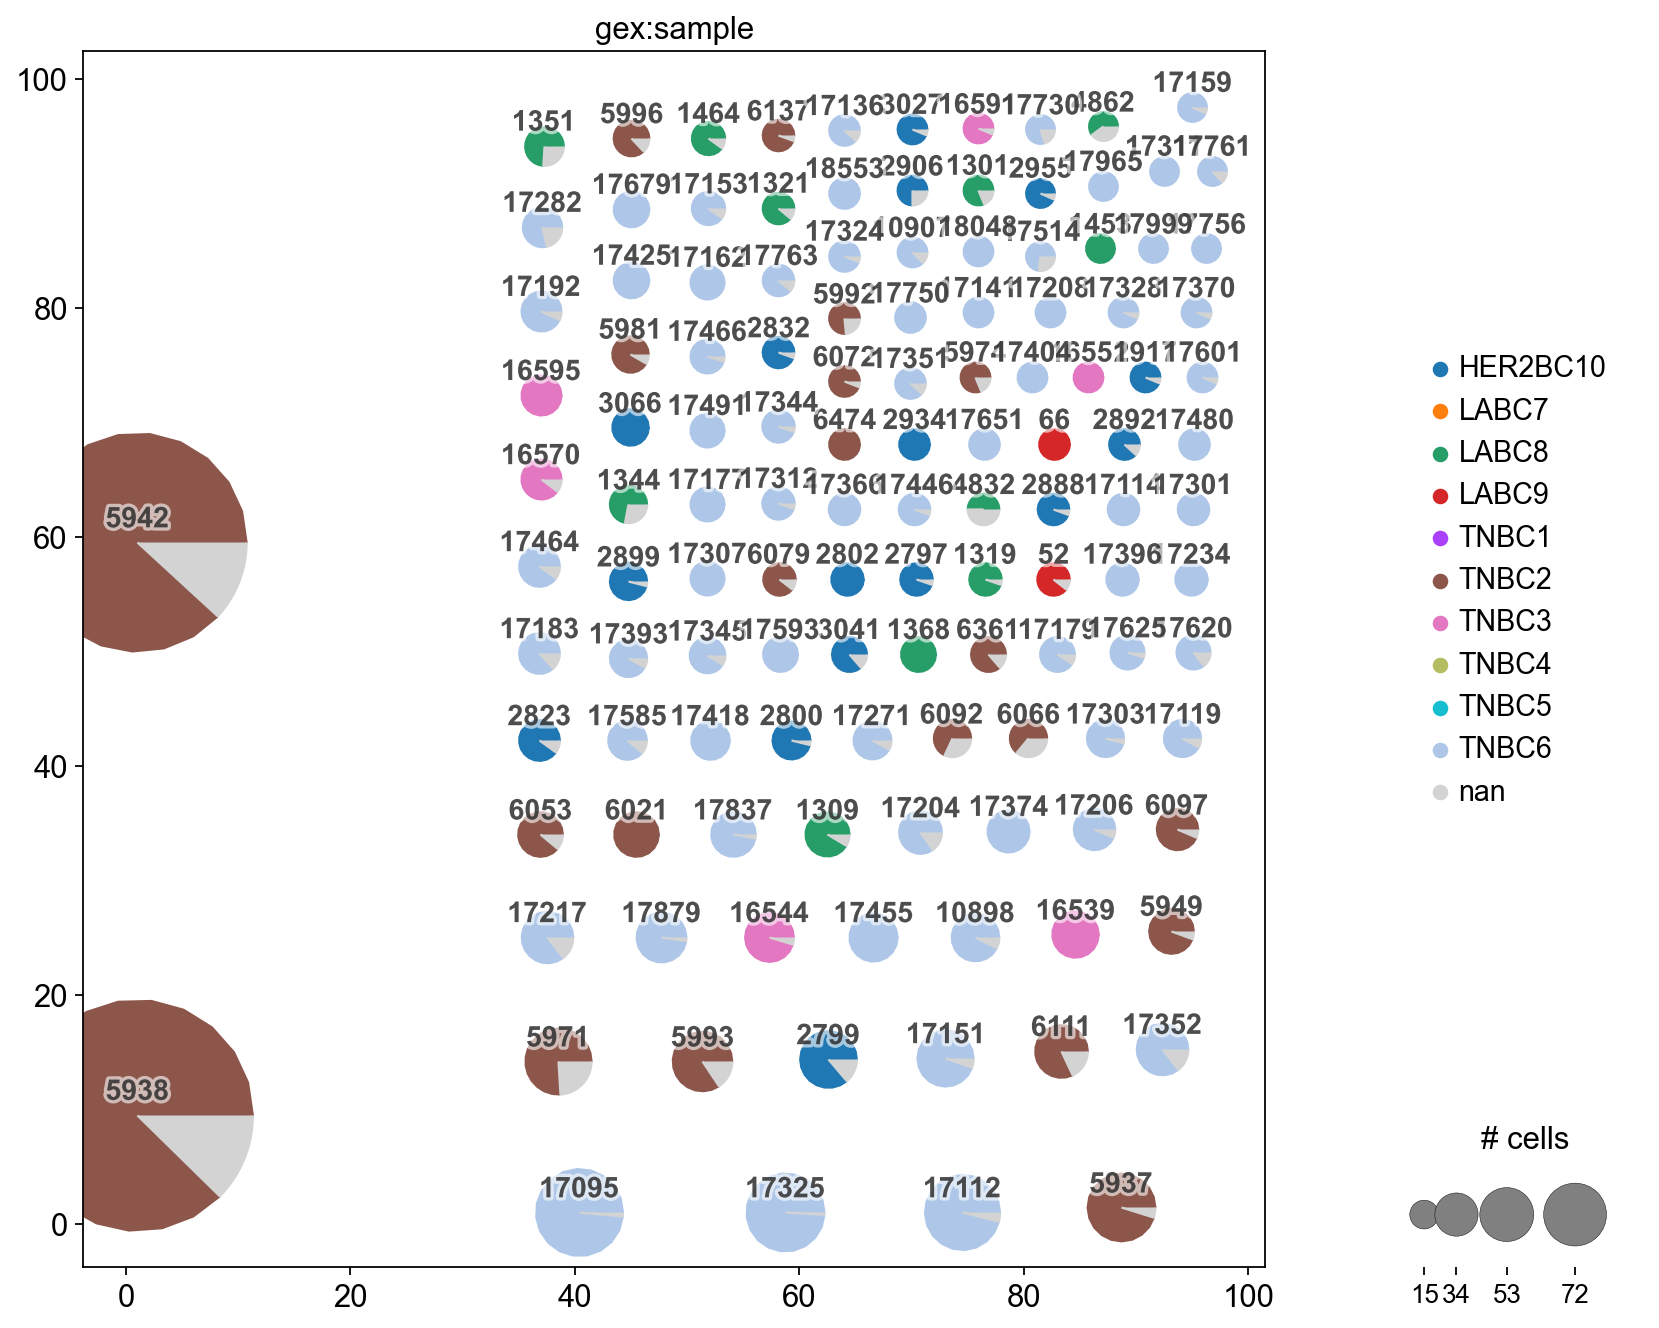

In [35]:
ir.tl.clonotype_network(bcmdata, min_cells=15)
ir.pl.clonotype_network(bcmdata, color='gex:molecular_type')
ir.pl.clonotype_network(bcmdata, color='gex:sample')
ir.pl.clonotype_network(bcmdata, color='gex:major-type')

Stored result in `mdata.obs["airr:clonal_expansion"]`.


/home/rzh/BCY/lib/python3.10/site-packages/scirpy/tl/_clonal_expansion.py:111: FutureWarning: The argument `clip_at` is deprecated. Please use `brekpoints` instead.
  warnings.warn("The argument `clip_at` is deprecated. Please use `brekpoints` instead.", category=FutureWarning)
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


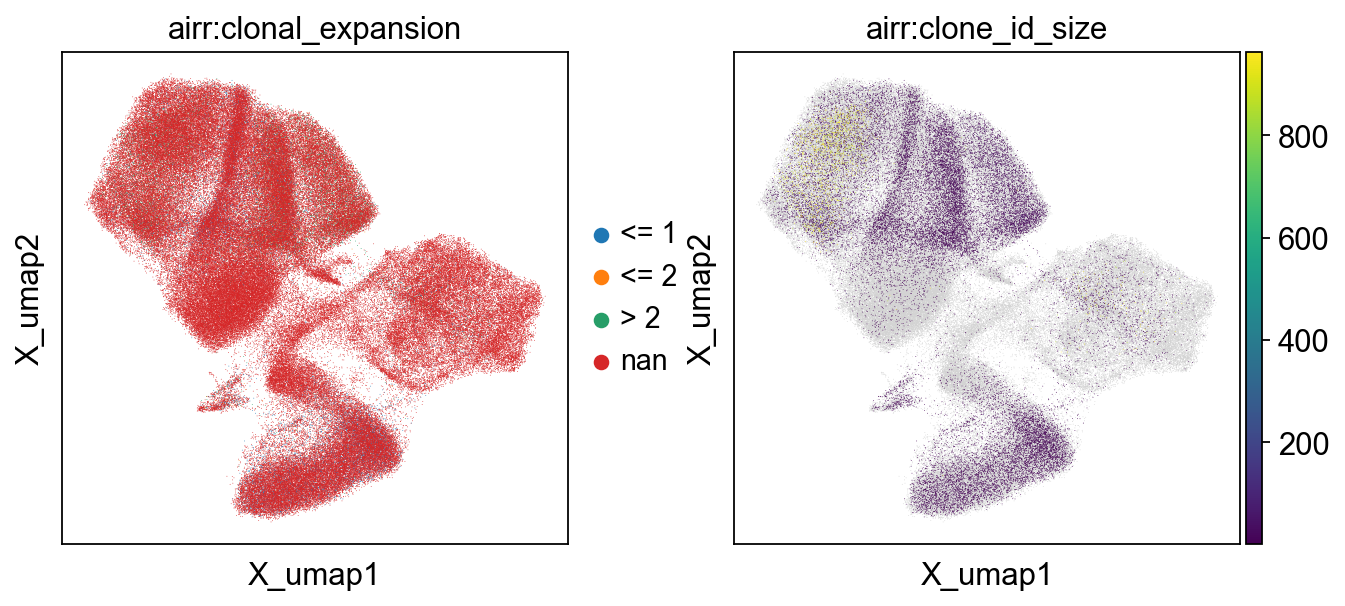

In [95]:
ir.tl.clonal_expansion(bcmdata, target_col="clone_id", clip_at=3, key_added="clonal_expansion")
mu.pl.embedding(bcmdata, basis='gex:umap',color=['airr:clonal_expansion', 'airr:clone_id_size'])

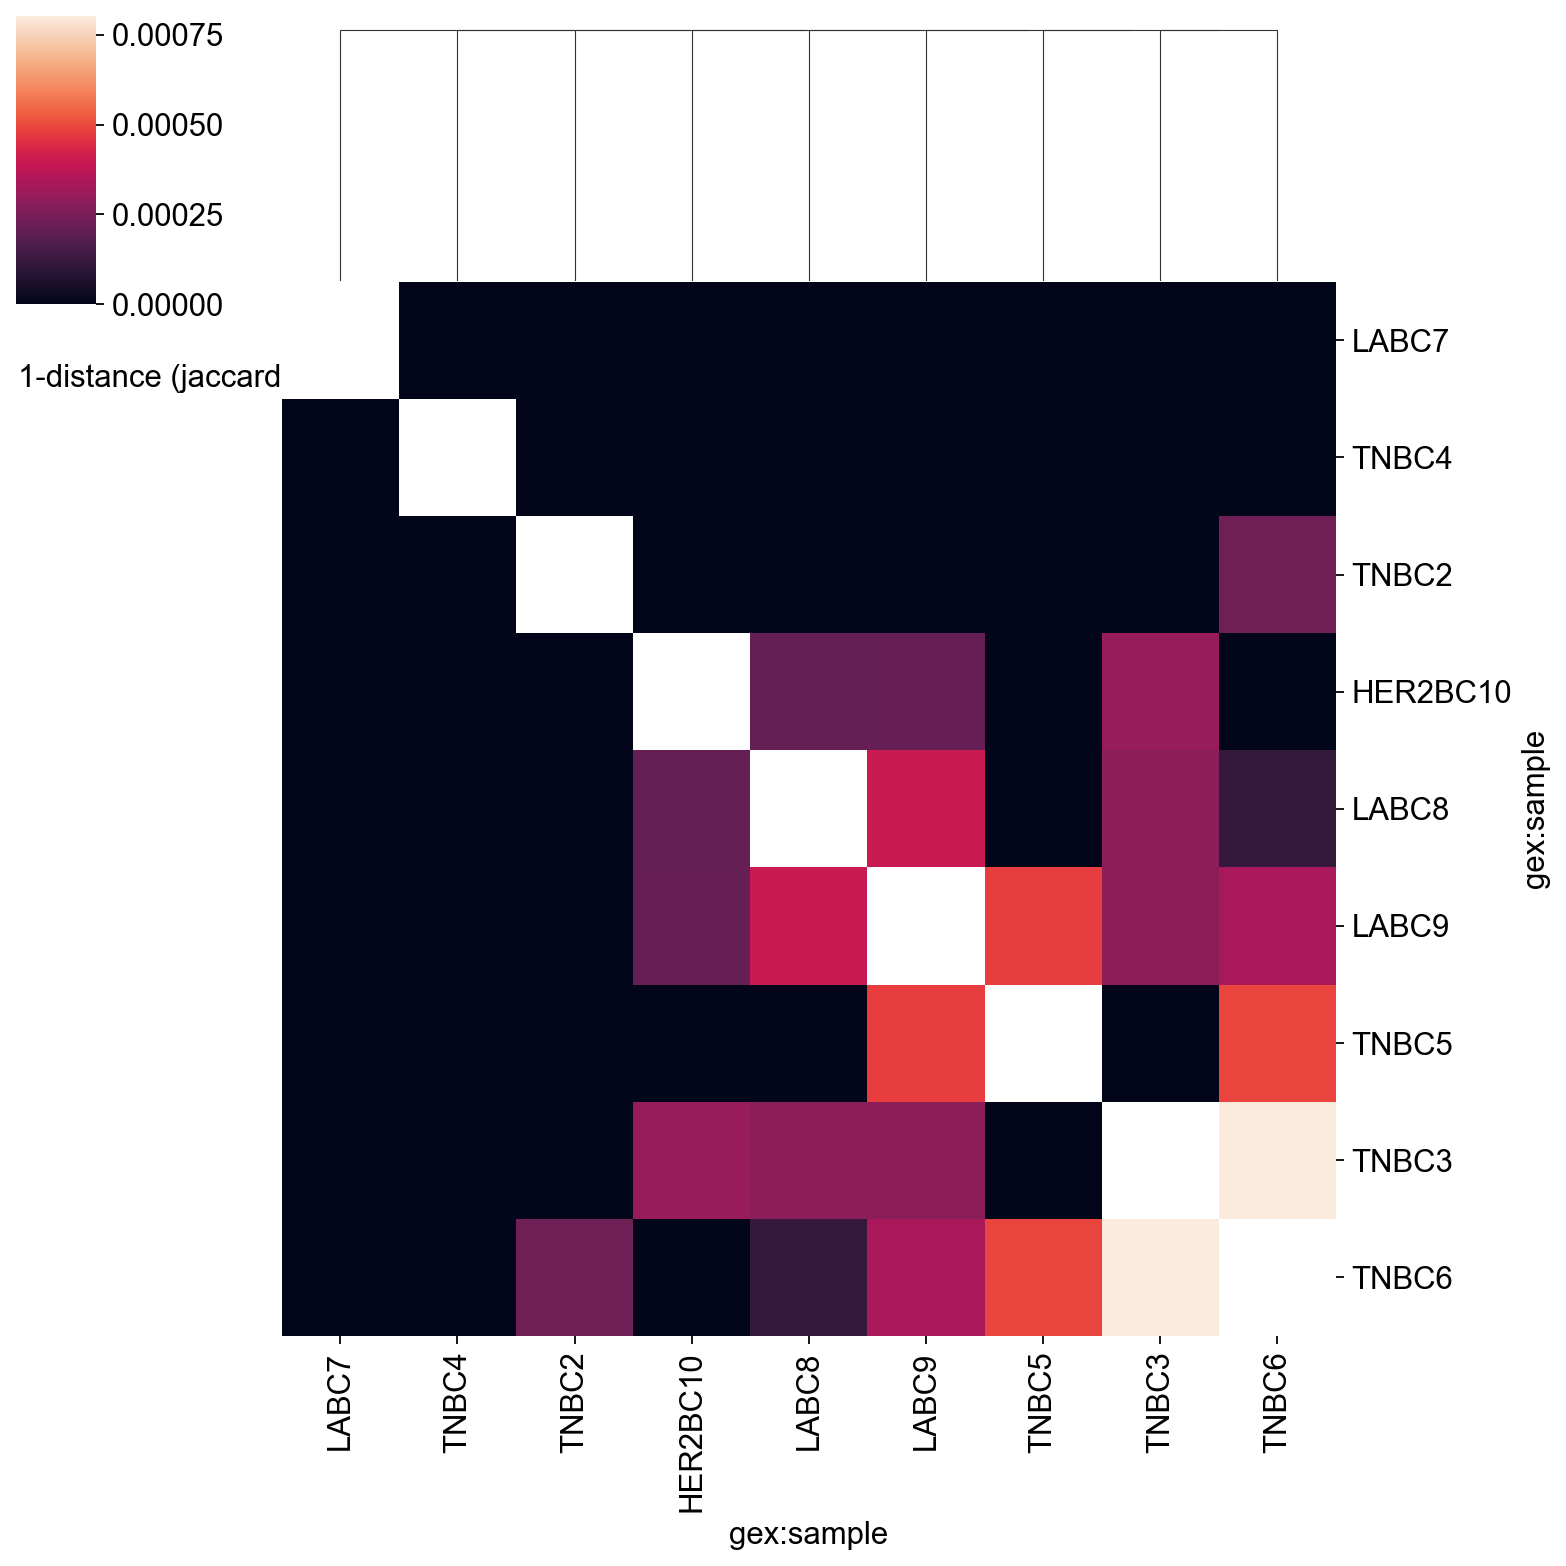

In [97]:
ir.tl.repertoire_overlap(bcmdata, groupby="gex:sample")
ir.pl.repertoire_overlap(bcmdata, groupby="gex:sample")

Initalizing clonotype subgraphs...


  0%|          | 0/19042 [00:00<?, ?it/s]

Computing background distributions...


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/rzh/BCY/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Stored result in `mdata.obs["airr:clonotype_modularity"]`.
Stored result in `mdata.obs["airr:clonotype_modularity_fdr"]`.


<AxesSubplot: xlabel='modularity score', ylabel='-log10(FDR)'>

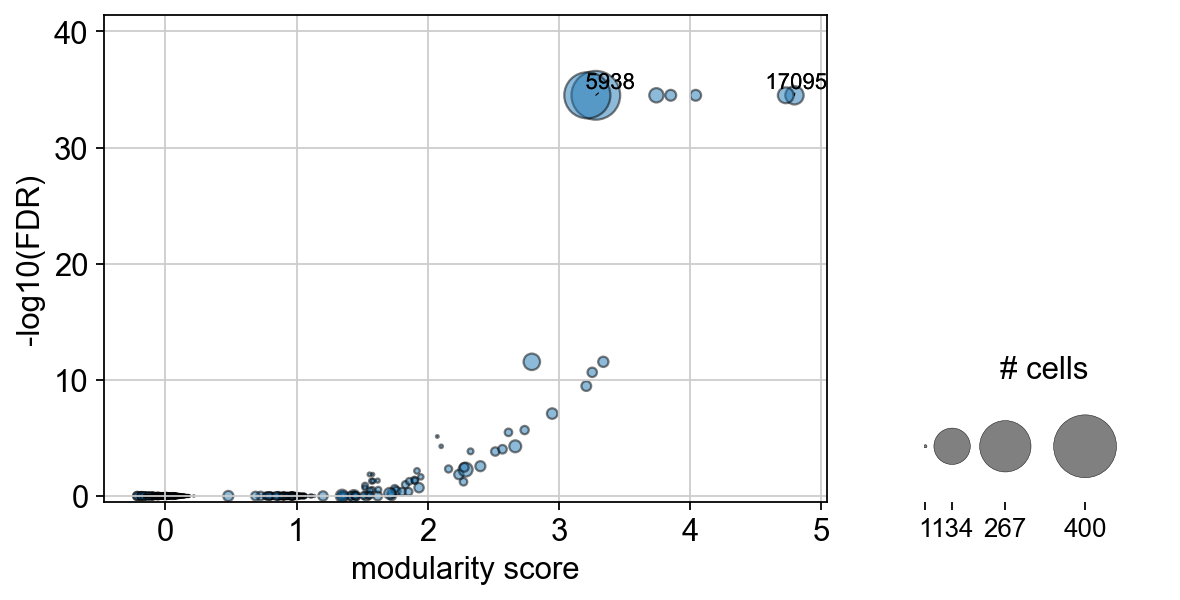

In [100]:
ir.tl.clonotype_modularity(bcmdata)
ir.pl.clonotype_modularity(bcmdata, labels=['17095', '5938', '59042'])

<AxesSubplot: title={'center': 'Alpha diversity of clone_id by gex:major-type'}, ylabel='Normalized Shannon Entropy'>

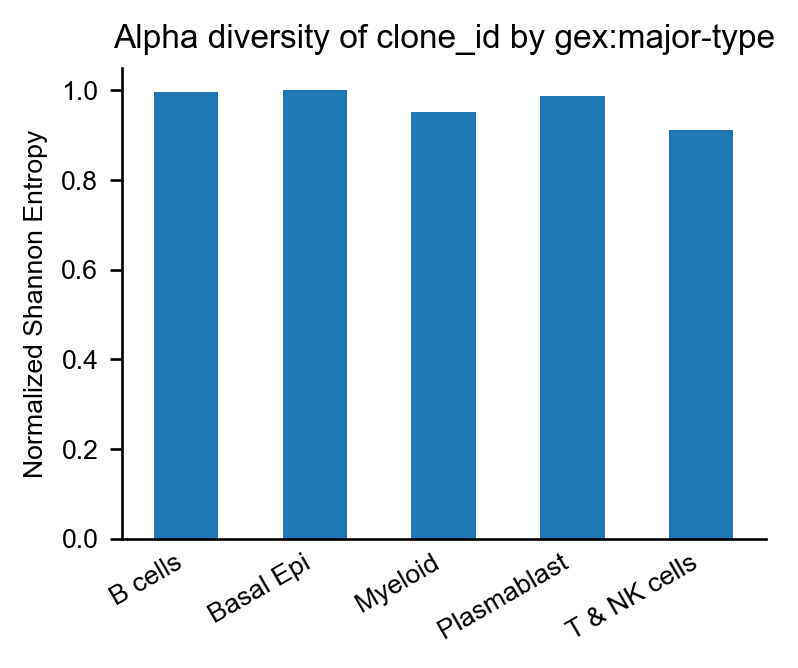

In [96]:
ir.pl.alpha_diversity(bcmdata, metric="normalized_shannon_entropy", groupby="gex:major-type")

In [108]:
ir.tl.clonotype_imbalance(bcmdata, replicate_col="gex:molecular_type", groupby="gex:major-type", case_label="T & NK cells")
ir.pl.clonotype_imbalance(bcmdata, replicate_col="gex:molecular_type", groupby="gex:major-type", case_label="T & NK cells")

/home/rzh/BCY/lib/python3.10/site-packages/scirpy/tl/_clonotype_imbalance.py:130: RuntimeWarning: divide by zero encountered in log10
  clt_stats.append([suspect, p, -np.log10(p), logfoldchange])


KeyError: 'clonotype_imbalance'

In [52]:
# write and load BCY
adata_ir.write_h5ad('adata-ir.h5ad')
bcy_ir = sc.read_h5ad('adata-ir.h5ad')
bcy_preF = sc.read_h5ad("adata-preF.h5ad")

In [ ]:
bcy_preF.obs_names = [f"{s.split('-')[0]}-1-{s.split('-')[1]}" for s in bcy_preF.obs_names]
bcydata = mu.MuData({'gex': bcy_preF, "airr":bcy_ir})
ir.pp.index_chains(bcydata)
ir.tl.chain_qc(bcydata)

In [ ]:
figsize=(11,3)

# GENE EXPRESSION OF T,B cells
fig, ax = plt.subplots(1, 3,figsize=figsize)
for i,g in enumerate(["CD3E", 'MS4A1', 'JCHAIN']):
  mu.pl.embedding(bcydata, basis="gex:umap", color=g, ax=ax[i], show=False)
  ax[i].set_xlabel("UMAP1")
  ax[i].set_ylabel("UMAP2")
fig.savefig(f"{figPath}/bcy-umap-expr.png", dpi=300, bbox_inches='tight')

# umap of TCR,BCR 
fig, ax = plt.subplots(1, 3,figsize=(13,3), constrained_layout=True)
for i,g in enumerate(["airr:receptor_type", "airr:receptor_subtype", 'airr:chain_pairing']):
  mu.pl.embedding(bcydata, basis="gex:umap", color=g, ax=ax[i], show=False)
  ax[i].set_xlabel("UMAP1")
  ax[i].set_ylabel("UMAP2")
fig.savefig(f"{figPath}/bcy-umap-tbcr.png", dpi=300, bbox_inches='tight')

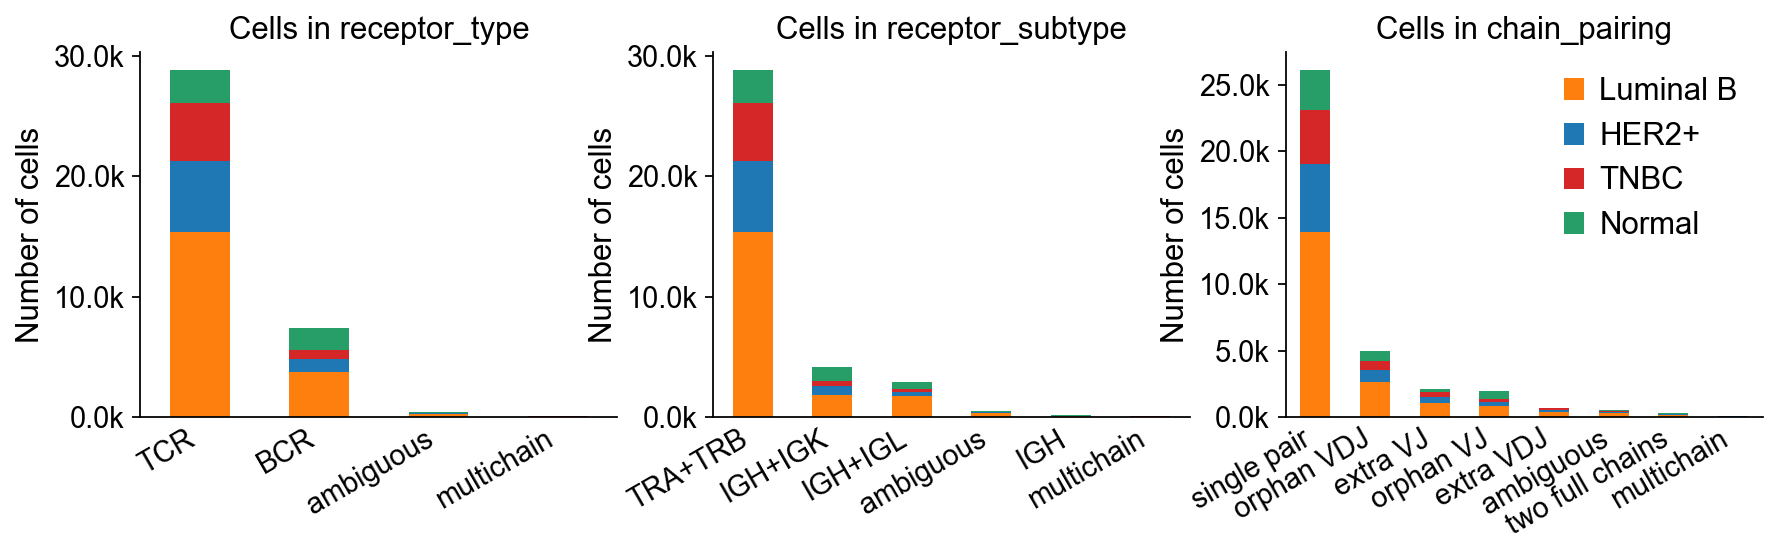

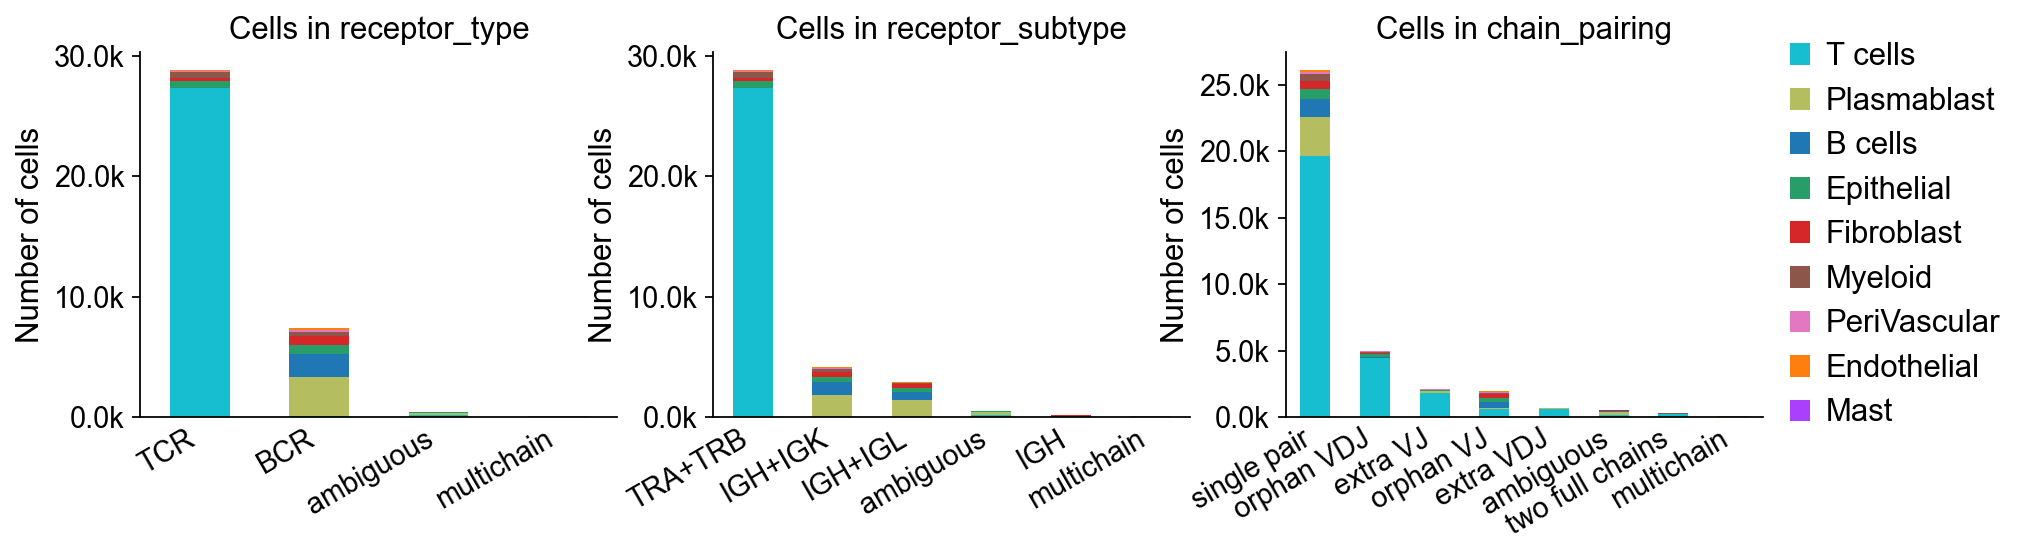

In [124]:
# abundance of TCR,BCR targeting molecular_type
def ks(x, pos):
    return '%1.1fk' % (x*1e-3)
fig, ax = plt.subplots(1, 3,figsize=(13,3))
for i,g in enumerate(["airr:receptor_type", "airr:receptor_subtype", 'airr:chain_pairing']):
  ir.pl.group_abundance(bcydata, groupby=g, 
                        target_col="gex:molecular_type", 
                        ax=ax[i], 
                        style_kws={"title": "Cells in {}".format(g.split(":")[1]),
                                   "xlab": '',
                                   "title_fontsize":14, 
                                   "label_fontsize":14, 
                                   "tick_fontsize":13,
                                   "add_legend": True})
  ax[i].yaxis.set_major_formatter(FuncFormatter(ks))
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend(fontsize=14,
      frameon=False, handletextpad=0.5, loc="best",
              borderpad=0.3,
              columnspacing=1.3,
              handlelength=0.65,)
fig.savefig(f"{figPath}/bcy-abundance-tbcr-molecular.png", dpi=300, bbox_inches='tight')

# abundance of TCR,BCR targeting major_type
fig, ax = plt.subplots(1, 3,figsize=(13,3))
for i,g in enumerate(["airr:receptor_type", "airr:receptor_subtype", 'airr:chain_pairing']):
  ir.pl.group_abundance(bcydata, groupby=g, 
                        target_col="gex:majorType-fix", 
                        ax=ax[i], 
                        style_kws={"title": "Cells in {}".format(g.split(":")[1]),
                                   "xlab": '',
                                   "title_fontsize":14, 
                                   "label_fontsize":14, 
                                   "tick_fontsize":13,
                                   "add_legend": True})
  ax[i].yaxis.set_major_formatter(FuncFormatter(ks))
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend(bbox_to_anchor=(1.55,0.5),fontsize=14,
      frameon=False, handletextpad=0.5, loc="right",
              borderpad=0.3,
              columnspacing=1.3,
              handlelength=0.65,)
fig.savefig(f"{figPath}/bcy-abundance-tbcr-major.png", dpi=300, bbox_inches='tight')

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.
Initializing lookup tables. 
Computing clonotype x clonotype distances.
NB: Computation happens in chunks. The progressbar only advances when a chunk has finished. 


  0%|          | 0/26688 [00:00<?, ?it/s]

Stored result in `mdata.obs["airr:clone_id"]`.
Stored result in `mdata.obs["airr:clone_id_size"]`.


<AxesSubplot: >

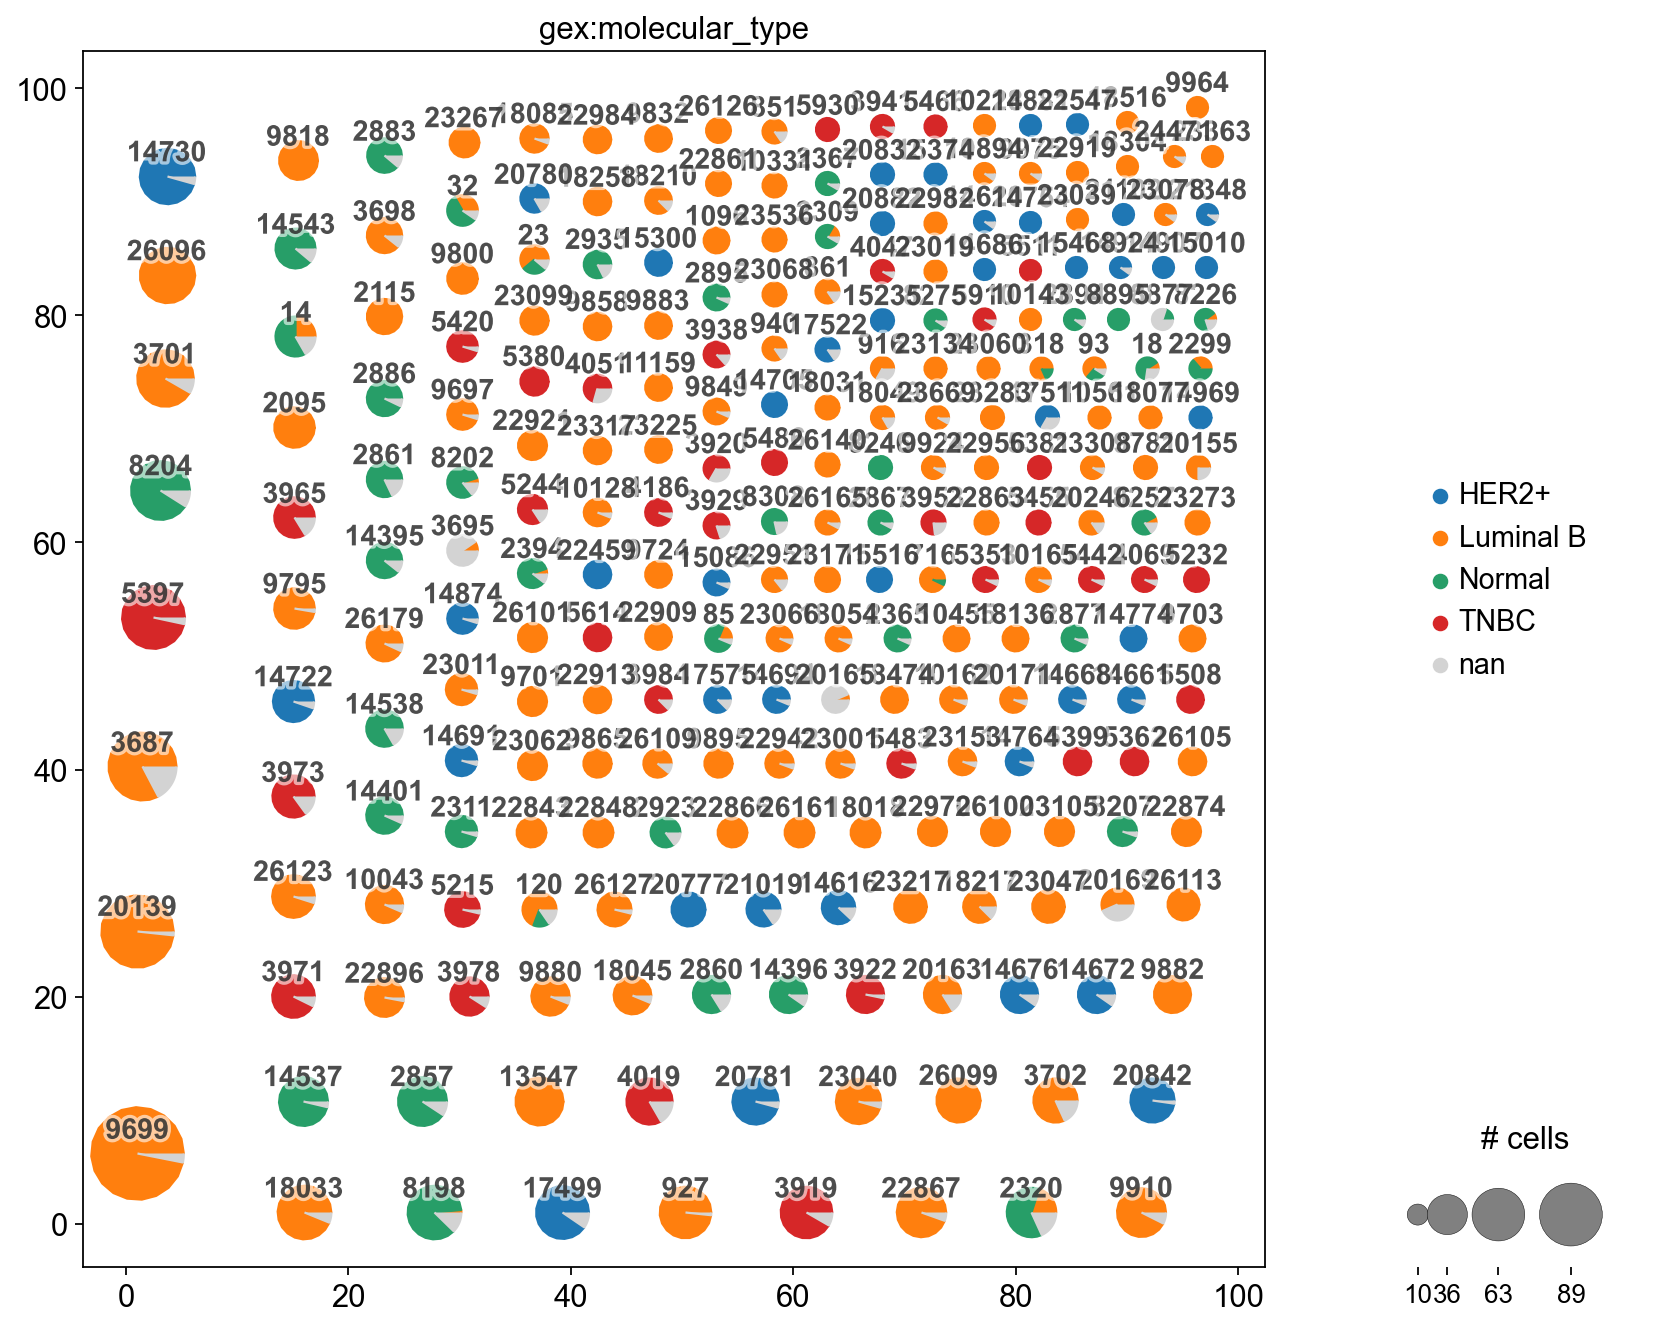

In [126]:
# define colonotype id and plot network
ir.pp.ir_dist(bcydata, metric="identity", sequence="nt", key_added="ir_dist_nt_identity", n_jobs=8)
ir.tl.define_clonotypes(bcydata, key_added="clone_id", same_v_gene=False, dual_ir='primary_only',receptor_arms="all" )
ir.tl.clonotype_network(bcydata, min_cells=10)
ir.pl.clonotype_network(bcydata, color='gex:molecular_type')

/home/rzh/BCY/lib/python3.10/site-packages/scirpy/tl/_clonal_expansion.py:111: FutureWarning: The argument `clip_at` is deprecated. Please use `brekpoints` instead.
  warnings.warn("The argument `clip_at` is deprecated. Please use `brekpoints` instead.", category=FutureWarning)


Stored result in `mdata.obs["airr:clonal_expansion"]`.


/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


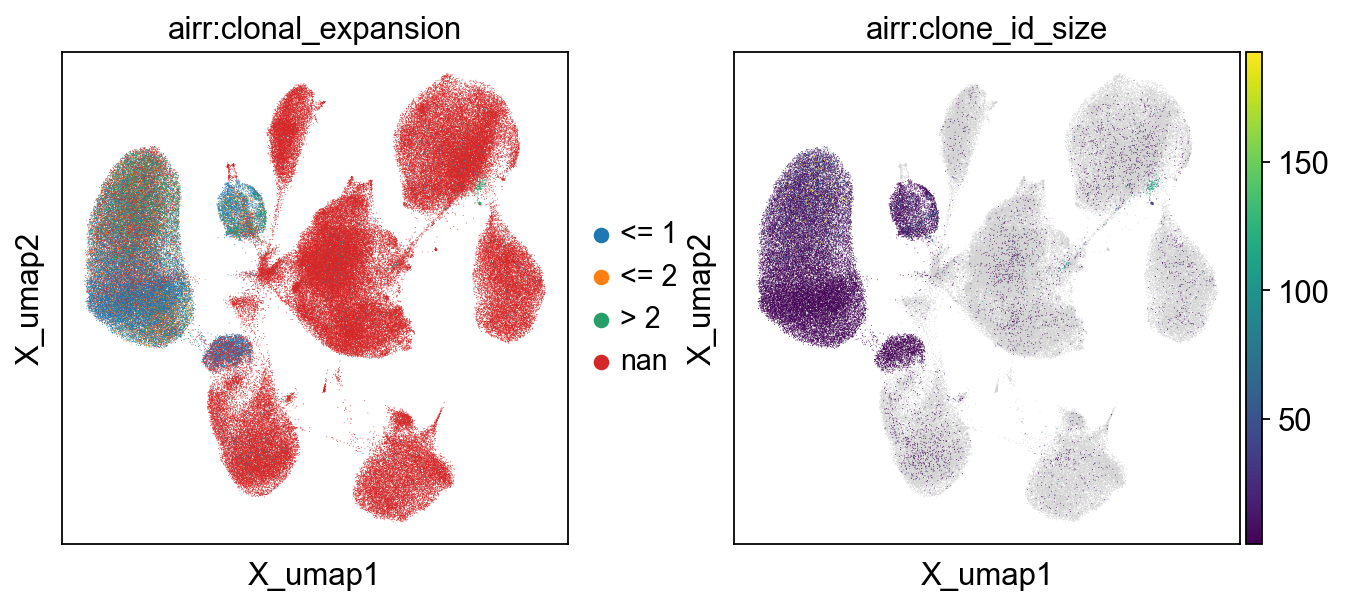

In [57]:
ir.tl.clonal_expansion(bcydata, target_col="clone_id", clip_at=3, key_added="clonal_expansion")
mu.pl.embedding(bcydata, basis='gex:umap',color=['airr:clonal_expansion', 'airr:clone_id_size'])

<AxesSubplot: title={'center': 'Alpha diversity of clone_id by gex:majorType-fix'}, ylabel='Normalized Shannon Entropy'>

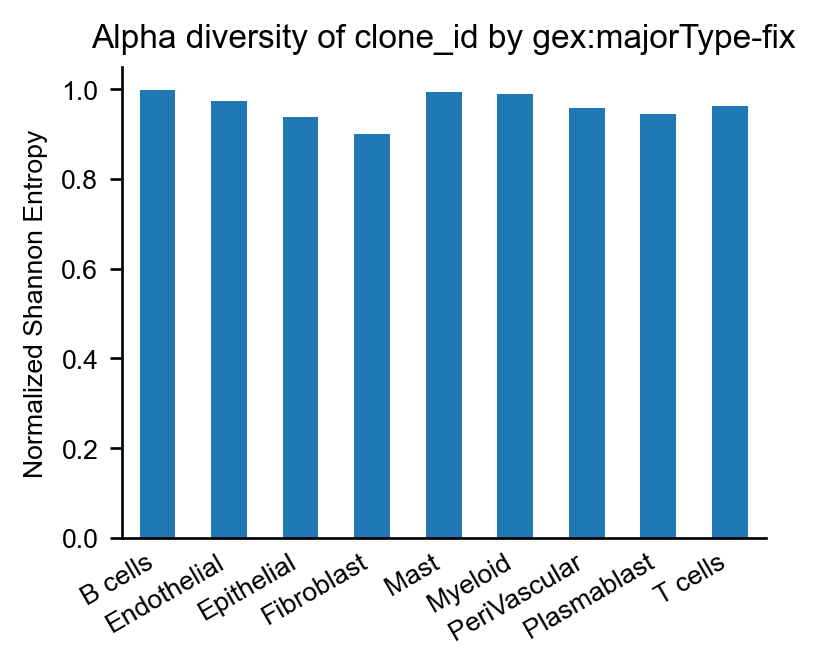

In [78]:
ir.pl.alpha_diversity(mdata, metric="normalized_shannon_entropy", groupby="gex:majorType-fix")

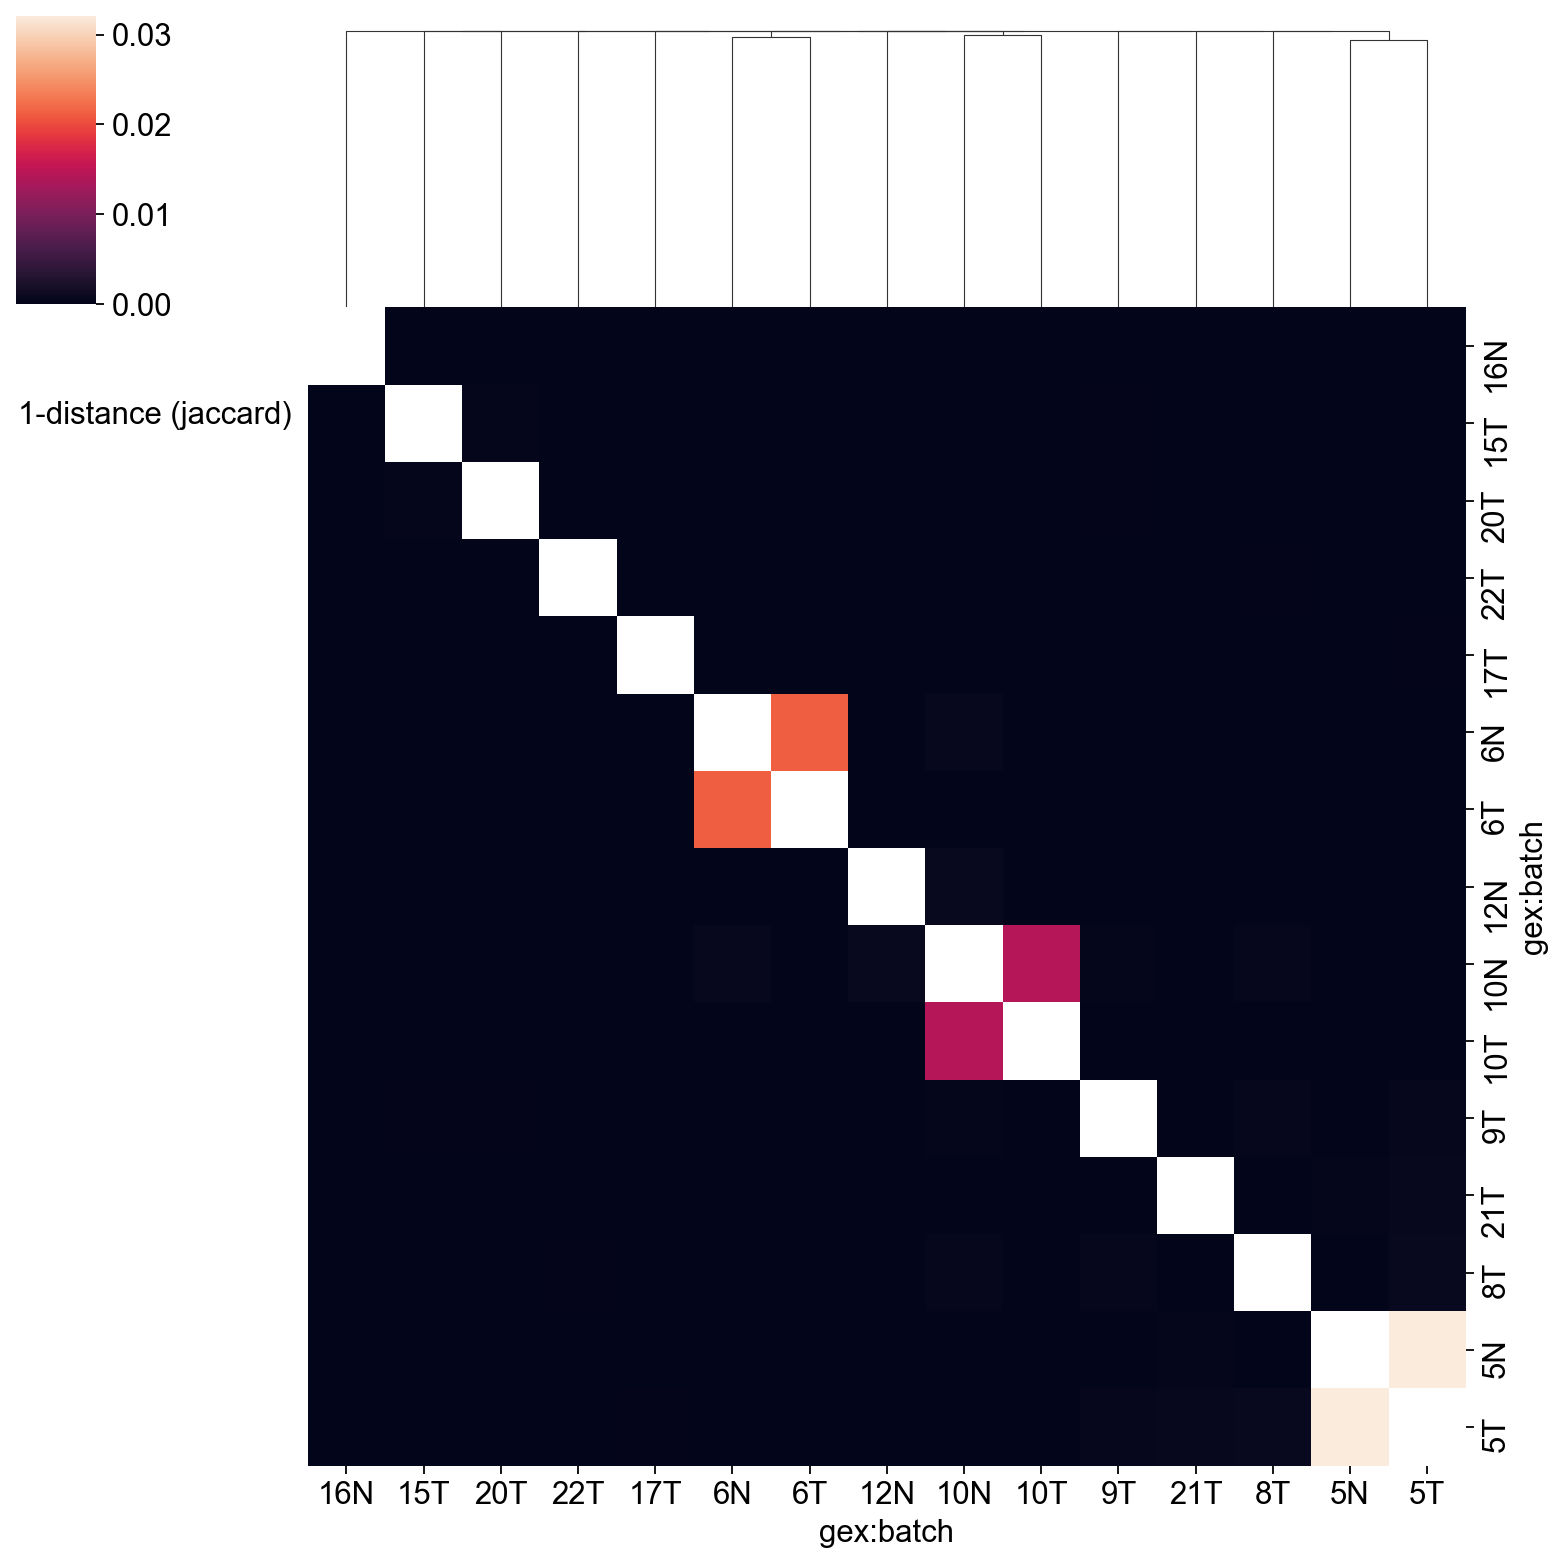

In [99]:
ir.tl.repertoire_overlap(bcydata, groupby="gex:batch")
ir.pl.repertoire_overlap(bcydata, groupby="gex:batch")

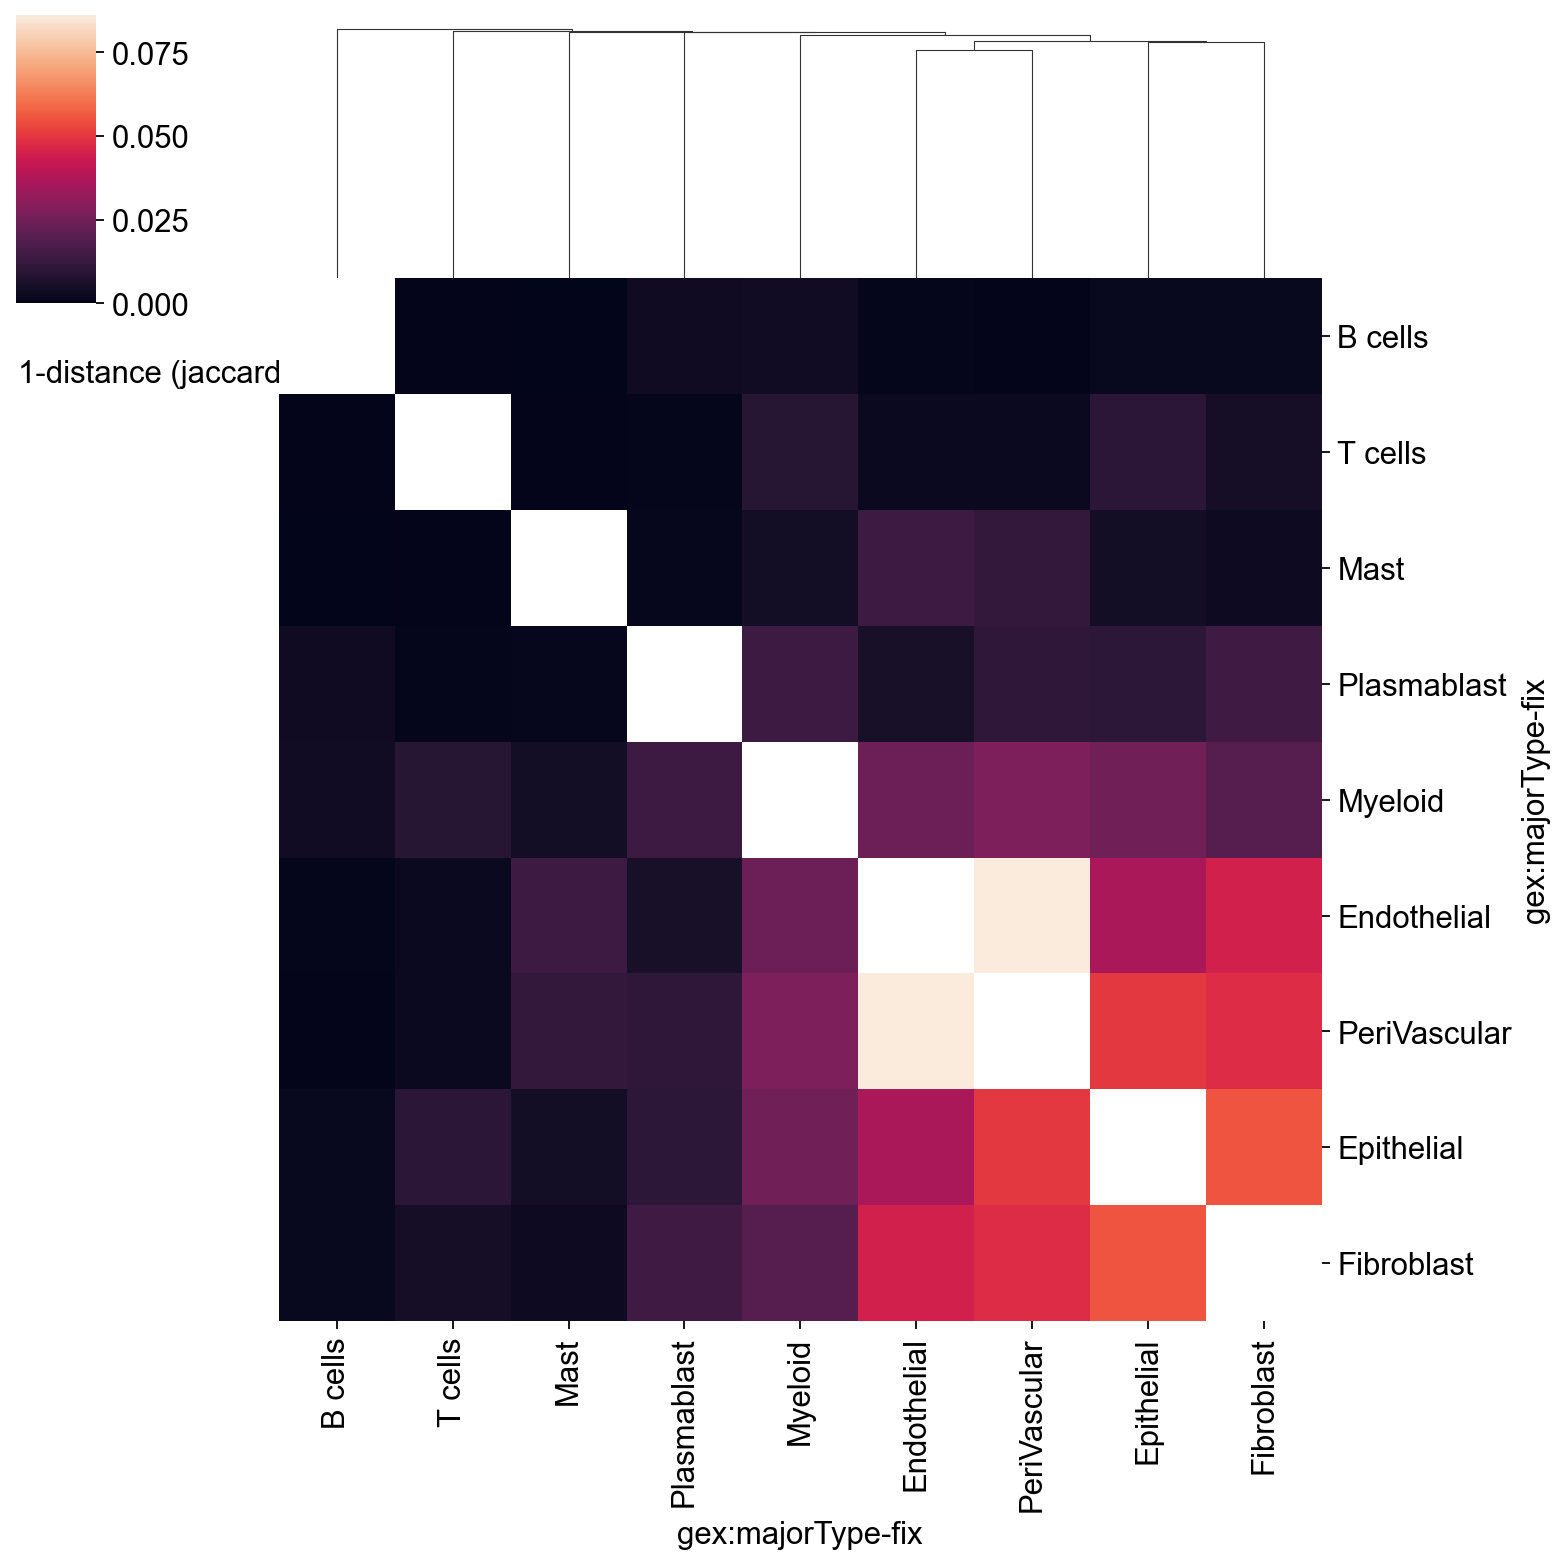

In [109]:
ir.tl.repertoire_overlap(bcydata, groupby="gex:majorType-fix")
ir.pl.repertoire_overlap(bcydata, groupby="gex:majorType-fix")

In [110]:
ir.tl.clonotype_imbalance(bcydata, replicate_col="gex:batch", groupby="gex:majorType-fix", case_label="T cells")
ir.pl.clonotype_imbalance(bcydata, replicate_col="gex:batch", groupby="gex:majorType-fix", case_label="T cells")

KeyError: "['1T', '2T', '3T'] not in index"

In [125]:
# merge cells in BCY and BCM
common_vars = pd.unique(bcy_preF.var_names.intersection(bcm_preF.var_names))
bcy_preF.obs['sample']=bcy_preF.obs['batch']
bcy_preF.obs['major-type']=bcy_preF.obs['majorType-fix']
data_preF = bcy_preF[:, common_vars].concatenate(bcm_preF, batch_categories=['Young', 'Middle'])
data_preF

/tmp/ipykernel_1617523/3912669654.py:5: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  data_preF = bcy_preF[:, common_vars].concatenate(bcm_preF, batch_categories=['Young', 'Middle'])


AnnData object with n_obs × n_vars = 397098 × 19885
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden', 'major_type', 'molecular_type', 'leiden_harmony', 'major_type_harmony', 'minor_type', 'minor-type', 'gender', 'doublet_score', 'predicted_doublet', 'leiden-harmony-female', 'majorType-Female', 'epi-subtype', 'majorType-fix', 'sample', 'major-type', 'leiden-major'
    var: 'n_cells_by_counts-Middle', 'mean_counts-Middle', 'log1p_mean_counts-Middle', 'pct_dropout_by_counts-Middle', 'total_counts-Middle', 'log1p_total_counts-Middle', 'n_cells-Middle', 'highly_variable-Middle', 'means-Middle', 'dispersions-Middle', 'dispersions_norm-Middle', 'ID-Middle', 'name-Middle', 'type-Middle', 'n_cells_by_counts-Young', 'mean_counts-Young', 'log1p_mean_counts-Young', 'pct_dropout_by_counts-Young', 'total_counts-Young', 'log1p_total_counts-Young', 'n_cells-Young', 'highly_variable-Young', 'means-Young', 

In [128]:
data_ir = ir.pp.merge_airr(bcy_ir, bcm_ir)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
data_T = data_preF[data_preF.obs['major-type'].isin(["T cells"]), :]
data_T.obs_names = [f"{s.split('-')[0]}-1-{s.split('-')[2]}" for s in data_T.obs_names]
data_T.obs_names_make_funique()
ir_T = data_ir[data_ir.obs_names.isin(data_T.obs_names)]
ir_T.obs_names_make_unique()
mdata_T = mu.MuData({'gex': data_T, "airr":ir_T})

In [149]:
data_B = data_preF[data_preF.obs['major-type'].isin(["B cells", "Plasmablast"]), :]
data_B.obs_names = [f"{s.split('-')[0]}-1-{s.split('-')[2]}" for s in data_B.obs_names]
data_B.obs_names_make_unique()
ir_B = data_ir[data_ir.obs_names.isin(data_B.obs_names)]
ir_B.obs_names_make_unique()
mdata_B = mu.MuData({'gex': data_B, "airr":ir_B})
mdata_B 

MuData object with n_obs × n_vars = 53360 × 19885
  2 modalities
    gex:	53360 x 19885
      obs:	'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden', 'major_type', 'molecular_type', 'leiden_harmony', 'major_type_harmony', 'minor_type', 'minor-type', 'gender', 'doublet_score', 'predicted_doublet', 'leiden-harmony-female', 'majorType-Female', 'epi-subtype', 'majorType-fix', 'sample', 'major-type', 'leiden-major'
      var:	'n_cells_by_counts-Middle', 'mean_counts-Middle', 'log1p_mean_counts-Middle', 'pct_dropout_by_counts-Middle', 'total_counts-Middle', 'log1p_total_counts-Middle', 'n_cells-Middle', 'highly_variable-Middle', 'means-Middle', 'dispersions-Middle', 'dispersions_norm-Middle', 'ID-Middle', 'name-Middle', 'type-Middle', 'n_cells_by_counts-Young', 'mean_counts-Young', 'log1p_mean_counts-Young', 'pct_dropout_by_counts-Young', 'total_counts-Young', 'log1p_total_counts-Young', 'n_cells-Young', 'highly_variable-Young', 'means-Young', 'dispersions-Young', 'dispersions_norm-Young'
      obsm:	'X_pca', 'X_pca_harmony', 'X_umap'
    airr:	13099 x 0
      obs:	'chain_pairing', 'clonal_expansion', 'clone_id', 'clone_id_size', 'clonotype_modularity', 'clonotype_modularity_fdr', 'receptor_subtype', 'receptor_type'
      uns:	'scirpy_version'
      obsm:	'airr'

In [150]:
mdata_T.write("mdata-T.h5mu")
mdata_B.write("mdata-B.h5mu")

In [151]:
mdata_T

MuData object with n_obs × n_vars = 178737 × 19885
  2 modalities
    gex:	178737 x 19885
      obs:	'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden', 'major_type', 'molecular_type', 'leiden_harmony', 'major_type_harmony', 'minor_type', 'minor-type', 'gender', 'doublet_score', 'predicted_doublet', 'leiden-harmony-female', 'majorType-Female', 'epi-subtype', 'majorType-fix', 'sample', 'major-type', 'leiden-major'
      var:	'n_cells_by_counts-Middle', 'mean_counts-Middle', 'log1p_mean_counts-Middle', 'pct_dropout_by_counts-Middle', 'total_counts-Middle', 'log1p_total_counts-Middle', 'n_cells-Middle', 'highly_variable-Middle', 'means-Middle', 'dispersions-Middle', 'dispersions_norm-Middle', 'ID-Middle', 'name-Middle', 'type-Middle', 'n_cells_by_counts-Young', 'mean_counts-Young', 'log1p_mean_counts-Young', 'pct_dropout_by_counts-Young', 'total_counts-Young', 'log1p_total_counts-Young', 'n_cells-Young', 'highly_variable-Young', 'means-Young', 'dispersions-Young', 'dispersions_norm-Young'
      obsm:	'X_pca', 'X_pca_harmony', 'X_umap'
    airr:	47725 x 0
      obs:	'chain_pairing', 'clonal_expansion', 'clone_id', 'clone_id_size', 'clonotype_modularity', 'clonotype_modularity_fdr', 'receptor_subtype', 'receptor_type'
      uns:	'scirpy_version'
      obsm:	'airr'